# Tutorial: Reading NG76 dataset with long evolution last row

We start by importing the required packages.

Feel free to uncomment the !pip lines to install the packages if you don't have them in your computer or virtual environment.

In [1]:
# Get necessary imports
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd
# !pip install graphviz
import graphviz
import json

Here's some constants for reference

In [2]:
# Units
Msun = 1.98855e30 # kg
G = 6.6743015e-11 # m^3/kgs^2
Mearth = 5.9722e24 #kg

# Conversion of angles
degrees = 180/np.pi # º
rad = np.pi/180 # rad

# Radius and Distances
au = 1.495978707e11 # m
Rsun = 6.957e8 # m
Rjup = 7.1492e7 # m

## Read the data

We choose the system to observe, the simulation name and the last name to get the right filepath.

In [3]:
isystem = 1
sim = "NG76"
last_name = "Marques"

# Path to the desired table
pathfile = f"{last_name}_{sim}_{isystem:04d}/{last_name}_{sim}_{isystem:04d}_evol.csv"

We use pandas to open and visualize the raw data

In [4]:
# Open data
data = pd.read_csv(pathfile, header=None)

# See database
data

,0,1,2,3,4,5,6,7,8,9,...,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402
0,1.000000e+02,75.408040,6064.471632,0.000133,0.000631,0.018712,224.292998,3.090474e-08,0.000878,284.695953,...,0.000680,246.464637,5.875591e-08,0.000813,0.0,10965581.0,12539.556,17979.567,0.042290,102.16102
1,1.151395e+02,20.755344,6064.540958,0.000138,0.000636,0.018712,224.292780,3.102919e-08,0.000879,345.226174,...,0.000734,239.509330,6.057690e-08,0.000821,0.0,10352503.0,12042.597,17267.005,0.042289,102.13797
2,1.325711e+02,86.301233,6064.469396,0.000127,0.000633,0.018711,224.292442,3.120308e-08,0.000881,69.581776,...,0.000822,230.604414,6.271016e-08,0.000830,0.0,9636995.1,11478.413,16458.050,0.042289,102.10928
3,1.526418e+02,103.436568,6064.508392,0.000124,0.000633,0.018711,224.291313,3.135763e-08,0.000882,144.340770,...,0.000911,223.374827,6.425926e-08,0.000837,0.0,9171974.2,11076.139,15881.257,0.042288,102.08655
4,1.757511e+02,257.160206,6064.446753,0.000126,0.000629,0.018710,224.290322,3.156880e-08,0.000884,246.176059,...,0.001048,214.653963,6.593839e-08,0.000844,0.0,8863900.5,10636.680,15251.210,0.042288,102.05876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.551286e+07,269.373506,33.850629,0.001008,0.000528,0.016506,230.437082,1.071288e-05,0.147375,68.303591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,7.543120e+07,42.933435,33.825883,0.000397,-0.001023,0.029439,105.628247,1.071288e-05,0.146417,315.276649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,8.685114e+07,178.772499,33.835967,-0.000186,0.000148,0.028906,357.953899,1.071288e-05,0.145584,262.365687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1.000000e+08,297.656251,33.834785,0.000642,0.000556,0.042490,5.720136,1.071288e-05,0.144373,346.820505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the metadata, we can get the list of the surviving planets at the end of the simulation.

In [5]:
#  Open metadata file to get data out
metadatafile = f"{last_name}_{sim}_{isystem:04d}/{last_name}_{sim}_{isystem:04d}_metadata.json"
with open(metadatafile) as f:
    metadata = json.load(f)

# Get list of surviving planets
planets_list = metadata['planet_list']
planets_list

['04',
 '06',
 '13',
 '19',
 '43',
 '45',
 '46',
 '49',
 '59',
 '67',
 '78',
 '82',
 '83',
 '85',
 '89',
 '97',
 '100']

### Required Columns

So, following the structure of the required data in the instructions file, we can collect the columns for each planet in the ```planets_list```.

In [6]:
# Collect columns range for each planet
required_columns = []
for i in range(len(planets_list)):
    required_columns.append(range(8*(i)+1, 8*i+8+1))
    
columns_names = ['mean_long', 'period', 'k', 'h', 'i', 'long_asc', 'mass', 'radius']

Let's see the data for the first planet ``"04"`` at the index 0. 

In [7]:
iplanet = 0

if len(required_columns) > 0:
    display(data[required_columns[iplanet]])

,1,2,3,4,5,6,7,8
0,75.408040,6064.471632,0.000133,0.000631,0.018712,224.292998,3.090474e-08,0.000878
1,20.755344,6064.540958,0.000138,0.000636,0.018712,224.292780,3.102919e-08,0.000879
2,86.301233,6064.469396,0.000127,0.000633,0.018711,224.292442,3.120308e-08,0.000881
3,103.436568,6064.508392,0.000124,0.000633,0.018711,224.291313,3.135763e-08,0.000882
4,257.160206,6064.446753,0.000126,0.000629,0.018710,224.290322,3.156880e-08,0.000884
...,...,...,...,...,...,...,...,...
95,269.373506,33.850629,0.001008,0.000528,0.016506,230.437082,1.071288e-05,0.147375
96,42.933435,33.825883,0.000397,-0.001023,0.029439,105.628247,1.071288e-05,0.146417
97,178.772499,33.835967,-0.000186,0.000148,0.028906,357.953899,1.071288e-05,0.145584
98,297.656251,33.834785,0.000642,0.000556,0.042490,5.720136,1.071288e-05,0.144373


As you can see, the last line contains some of the long evolution data but every since variable has data (like the mean longitude, k, h, and longitude of ascending node).

As a suggestion, we can take the values from the row before to replace the ``NaN`` for column in the database.

In [8]:
for col in data.columns.to_list():
    if np.isnan(data[col].iloc[-1]):
        data[col].iloc[-1] = data[col].iloc[-2]

if len(required_columns) > 0: 
    display(data[required_columns[iplanet]])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,1,2,3,4,5,6,7,8
0,75.408040,6064.471632,0.000133,0.000631,0.018712,224.292998,3.090474e-08,0.000878
1,20.755344,6064.540958,0.000138,0.000636,0.018712,224.292780,3.102919e-08,0.000879
2,86.301233,6064.469396,0.000127,0.000633,0.018711,224.292442,3.120308e-08,0.000881
3,103.436568,6064.508392,0.000124,0.000633,0.018711,224.291313,3.135763e-08,0.000882
4,257.160206,6064.446753,0.000126,0.000629,0.018710,224.290322,3.156880e-08,0.000884
...,...,...,...,...,...,...,...,...
95,269.373506,33.850629,0.001008,0.000528,0.016506,230.437082,1.071288e-05,0.147375
96,42.933435,33.825883,0.000397,-0.001023,0.029439,105.628247,1.071288e-05,0.146417
97,178.772499,33.835967,-0.000186,0.000148,0.028906,357.953899,1.071288e-05,0.145584
98,297.656251,33.834785,0.000642,0.000556,0.042490,5.720136,1.071288e-05,0.144373


We can also replace the column numbers for column names with the ID of the planet.

In [9]:
try: 
    # Create the columns names and dictionary to replace it on dataframe
    columns_planet = [name + f"_{int(planets_list[iplanet])}" for name in columns_names]
    replace_dict = {key: name for key, name in zip(required_columns[iplanet], columns_planet)}

    # Replace the names of the variables
    data.rename(columns=replace_dict, inplace=True)

    # See the required for the planet
    display(data[columns_planet])
except:
    pass

,mean_long_4,period_4,k_4,h_4,i_4,long_asc_4,mass_4,radius_4
0,75.408040,6064.471632,0.000133,0.000631,0.018712,224.292998,3.090474e-08,0.000878
1,20.755344,6064.540958,0.000138,0.000636,0.018712,224.292780,3.102919e-08,0.000879
2,86.301233,6064.469396,0.000127,0.000633,0.018711,224.292442,3.120308e-08,0.000881
3,103.436568,6064.508392,0.000124,0.000633,0.018711,224.291313,3.135763e-08,0.000882
4,257.160206,6064.446753,0.000126,0.000629,0.018710,224.290322,3.156880e-08,0.000884
...,...,...,...,...,...,...,...,...
95,269.373506,33.850629,0.001008,0.000528,0.016506,230.437082,1.071288e-05,0.147375
96,42.933435,33.825883,0.000397,-0.001023,0.029439,105.628247,1.071288e-05,0.146417
97,178.772499,33.835967,-0.000186,0.000148,0.028906,357.953899,1.071288e-05,0.145584
98,297.656251,33.834785,0.000642,0.000556,0.042490,5.720136,1.071288e-05,0.144373


After these required columns for the planets, we can also get the two required columns for the Star.

In [10]:
# Get star columns and create replace dictionary
star_columns = np.array([1, 2]) + required_columns[-1][-1] if len(required_columns) > 0 else np.array([1, 2])
replace_dict_star = {star_columns[0]: 'Mstar', star_columns[1]: 'Rstar'}

# Replace the names of the variables
data.rename(columns=replace_dict_star, inplace=True)

In [11]:
# Get Star Data
data[['Mstar', 'Rstar']] # in Msun and Rsun, respectively.

,Mstar,Rstar
0,1,3.091846
1,1,3.091846
2,1,3.091846
3,1,3.091846
4,1,3.091846
...,...,...
95,1,0.897286
96,1,0.898738
97,1,0.899703
98,1,0.900938


Let's not forget that the first column is actually the time in years. 

For this dataset, we sampled logarithmically the time from $t=1000$ years to $t=10^8$ years and we added the last row for the state of the simulation at $t=5\times10^9$ years.

In [12]:
# Replace the names of the variables
data.rename(columns={0: 't'}, inplace=True)
data['t']

0     1.000000e+02
1     1.151395e+02
2     1.325711e+02
3     1.526418e+02
4     1.757511e+02
          ...     
95    6.551286e+07
96    7.543120e+07
97    8.685114e+07
98    1.000000e+08
99    5.000000e+09
Name: t, Length: 100, dtype: float64

## Extra Information

### For Surviving Planets

We added some extra columns for each surviving planet in the simulations, containing information we thought would be relevant for further analysis. 

For these planets, these columns include:
- fraction of ice;
- migration timescale in years;
- eccentricity damping timescale in years;
- inclination damping timescale in years;
- mass of gas disk in $M_\odot$;
- mass of planetesimals in $M_\oplus$.

We can also collect those and analyse it for our planet 4.

In [13]:
try:
    extra_columns = []
    for i in range(len(planets_list)):
        extra_columns.append(range(6*(i)+1+star_columns[-1], 6*i+6+1+star_columns[-1]))
        
    extra_columns_names = ['f_ice', 't_mig', 't_damp_e', 't_damp_i', 'mass_gas_disk', 'mass_plts']

    # Create the columns names and dictionary to replace it on dataframe
    extra_columns_planet = [name + f"_{int(planets_list[iplanet])}" for name in extra_columns_names]
    extra_replace_dict = {key: name for key, name in zip(extra_columns[iplanet], extra_columns_planet)}

    # Replace the names of the variables
    data.rename(columns=extra_replace_dict, inplace=True)
    display(data[extra_columns_planet])
except:
    extra_columns_names = ['f_ice', 't_mig', 't_damp_e', 't_damp_i', 'mass_gas_disk', 'mass_plts']

,f_ice_4,t_mig_4,t_damp_e_4,t_damp_i_4,mass_gas_disk_4,mass_plts_4
0,0.504102,6.361993e+07,6.244185e+05,8.953201e+05,0.042290,102.161020
1,0.504102,6.336895e+07,6.219716e+05,8.918118e+05,0.042289,102.137970
2,0.504102,6.301851e+07,6.185770e+05,8.869444e+05,0.042289,102.109280
3,0.504102,6.267651e+07,6.155573e+05,8.826139e+05,0.042288,102.086550
4,0.504102,6.226626e+07,6.114614e+05,8.767413e+05,0.042288,102.058760
...,...,...,...,...,...,...
95,0.495919,1.000000e+20,1.000000e+20,1.000000e+20,0.000000,59.625676
96,0.495919,1.000000e+20,1.000000e+20,1.000000e+20,0.000000,59.579616
97,0.495919,1.000000e+20,1.000000e+20,1.000000e+20,0.000000,59.535753
98,0.495919,1.000000e+20,1.000000e+20,1.000000e+20,0.000000,59.484067


### Non Surviving Planets

The non-surviving planets list is given in the ```additional_info.json```. 

We also provide other information as the list of planets ejected from the system, accreted by the central Star and containing a mass below the minimum mass threshold (in this case of $0.1 M_\oplus$)

In [14]:
# Path to additional info
additionalinfo_file = f"{last_name}_{sim}_{isystem:04d}/additional_info.json"

# Open additional info json
with open(additionalinfo_file) as f:
    additional_info = json.load(f)
    
# Get list of surviving planets
non_surviving_planets_list = additional_info['non_surviving_planets']
len(non_surviving_planets_list)

83

For these planets, we provide all the columns provided to the surviving planets together.
The order of the columns is as follows:
- 8 initial required columns in the structure and units provided in the activity B instructions.
- 6 additional columns explained previously for further analysis (see previous section).

We can collect the data for the first non surviving planet, planet ``01``. To do so, we need to collect the 14 following columns after the extra data of the last surviving planet.

In [15]:
# Non surviving first planet id
inplanet = 0

nonsurviving_columns = []
if len(planets_list) > 0:
    for i in range(len(non_surviving_planets_list)):
        nonsurviving_columns.append(range(14*(i)+1+extra_columns[-1][-1], 14*i+14+1+extra_columns[-1][-1]))
else:
    for i in range(len(non_surviving_planets_list)):
        nonsurviving_columns.append(range(14*(i)+1+star_columns[-1], 14*i+14+1+star_columns[-1]))
    
non_surviving_column_names = columns_names + extra_columns_names 
non_surviving_column_names

['mean_long',
 'period',
 'k',
 'h',
 'i',
 'long_asc',
 'mass',
 'radius',
 'f_ice',
 't_mig',
 't_damp_e',
 't_damp_i',
 'mass_gas_disk',
 'mass_plts']

In [16]:
# Create the columns names and dictionary to replace it on dataframe
non_surviving_column_planet = [name + f"_{int(non_surviving_planets_list[inplanet])}" for name in non_surviving_column_names]
non_surviving_replace_dict = {key: name for key, name in zip(nonsurviving_columns[inplanet], non_surviving_column_planet)}

# Replace the names of the variables
data.rename(columns=non_surviving_replace_dict, inplace=True)
data[non_surviving_column_planet]

,mean_long_1,period_1,k_1,h_1,i_1,long_asc_1,mass_1,radius_1,f_ice_1,t_mig_1,t_damp_e_1,t_damp_i_1,mass_gas_disk_1,mass_plts_1
0,323.669960,55.312585,0.000386,0.000114,0.014325,295.254686,4.871217e-08,0.000763,0.0,18575705.0,90449.502,129688.60,0.042290,102.16102
1,321.304114,55.312652,0.001183,-0.000672,0.014329,294.654558,4.993331e-08,0.000769,0.0,18807426.0,88139.929,126389.73,0.042289,102.13797
2,178.354757,55.309884,0.001212,-0.001814,0.014381,293.515650,5.135638e-08,0.000776,0.0,18967553.0,85586.055,122777.99,0.042289,102.10928
3,127.533918,55.312888,0.000355,-0.001294,0.014350,292.672233,5.243459e-08,0.000782,0.0,18161219.0,83821.123,120225.23,0.042288,102.08655
4,291.409858,55.309446,-0.000395,0.000226,0.014345,291.259056,5.372567e-08,0.000788,0.0,15914503.0,81839.857,117342.72,0.042288,102.05876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data[non_surviving_column_planet].mass_1.iloc[-1] * 1.98855e30 / 5.9722e24

nan

## Status Diagram

As you can see, at some point the rows don't contain values anymore (```NaN```). This is because the planet did not survive the full simulation, it was accreted or ejected... and so on. The first row containing NaN allows us to track back the time in which the planet "disappeared".

Then, using the dictionary of status in the ```additional_info.json``` allows us to understand what happened to it more in detail.
The status code can be:
- negative: where the absolute value corresponds to the ID of the planet that accreted it;
- 0: all went fine and the planet survived in the end (not used in this case);
- 2: planet was ejected from the system ($a\geq1000$ au);
- 3: planet was accreted by the central Star;
- 5 & 6: situations in which it was not possible to do the evolution of this planet;
- 8: the core of the planet was fully evaporated;
- 9: the planet tidally spiraled into the central Star;

In [18]:
# Get status dictionary
status_dictionary = additional_info["status_planets"]

# Finding time of "death"
try:
    idx = data[non_surviving_column_planet][data[non_surviving_column_planet].isnull().all(axis=1)].iloc[0].name
except:
    idx = -1
print(f"Planet did not survive with a status {int(status_dictionary[non_surviving_planets_list[inplanet]])} at time t = {data['t'].iloc[idx] :.2e} years.") 

Planet did not survive with a status -39 at time t = 3.91e+03 years.


This means that planet ``01`` was accreted by planet ``39``.

Yet, it can be more complex than that. Planets can accrete planets and get accreted by other planets.
To provide a visual aids to see these evolutions, a status diagram can be drawn.

In [19]:
list(status_dictionary.keys())

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100']

In [20]:
def reorganize_status_data(status_dictionary: dict, params_dictionary: dict):
    """
    Reorganizes the data of the status_dictionary coming from the additional_info.json, into a better structure 
    for the status diagrams of the planets.
    
    Args:
        status_dictionary (dict): dictionary with status of simulations coming from additional_info.json.
        params_dictionary (dict): contains final mass and semi-major axis for each planet at the end of its simulation time.
        
    Returns:
        dict: status dictionary reorganized to be able to be drawn into a diagram.
    """
    
    # Initialize new status dictionary
    new_status_dictionary = {
        'star_accreted': [], 
        'survived': [],
        'ejected': [], 
        'too_small': [],
        'other': [],
        'label': {}
    }
    
    for p in range(1, 101):
        
        planet = f"{p:03d}"
        if planet in status_dictionary.keys():
            status = int(status_dictionary[planet])
        else:
            status = int(0)
        # Get status and parameters
        mass = params_dictionary[planet]['mass']
        a = params_dictionary[planet]['a']
        
        # Make label
        new_status_dictionary['label'][str(int(planet))] = "{:d}\n\n{:.2f} M⊕\n{:.2f} au".format(int(planet), mass, a)
        
        # Reorganize new information of status
        if status < 0:
            if str(np.abs(int(status))) not in list(new_status_dictionary.keys()):
                new_status_dictionary[str(np.abs(int(status)))] = [str(int(planet))]
            else:
                new_status_dictionary[str(np.abs(int(status)))].append(str(int(planet)))
        elif status == 0 and mass > 0.1:
            new_status_dictionary['survived'].append(str(int(planet)))
        elif status == 0 and mass <= 0.1:
            new_status_dictionary['too_small'].append(str(int(planet)))
        elif status == 2:
            new_status_dictionary['ejected'].append(str(int(planet)))
        elif status == 3:
            new_status_dictionary['star_accreted'].append(str(int(planet)))
        elif status > 3: 
            new_status_dictionary['other'].append(str(int(planet)))
    
    return new_status_dictionary
    

def draw_status_diagram(status_dictionary: dict):
    """
    Generates a diagram containing the evolution of the planets: 
        - if they are accreted by other planets;
        - if they are accreted by central star;
        - if they were ejected from the system;
        - if they survived the formation and evolution phases.
        
    Args:
        pathfile (str): path to save diagram (without the end extension ".something")
        directory (str): where it is supposed to be saved (folder level).
        status_dictionary (dict): contains the status of all planets in the simulation.
        
    Returns:
        graph: diagram from graphviz which can be displayed and saved.
    """
    # Create Diagram
    g = graphviz.Digraph("status_graph")
    g.attr(rankdir="TB", outputorder="nodesfirst")
    g.attr("node", shape="doublecircle", rank="same")
    
    # Create Nodes of survived planets
    for planet in status_dictionary["survived"]:
        g.node(str(planet), status_dictionary["label"][str(planet)], **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})

    # Add other relevant end Nodes
    g.attr("node", shape="tripleoctagon", rank="same")
    g.node('Accreted by Star', **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})
    g.node('Ejected', **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})
    g.node('Mass < 0.1 M⊕', **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})
    g.node('Other', **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})
    
    # Add intermediate planets Nodes
    g.attr("node", shape="circle")
    for i in range(1, 101):
        if str(i) not in status_dictionary["survived"]:
            g.node(str(i), status_dictionary["label"][str(i)], **{'width':str(1), 'height': str(1)})

    # Add all relevant edges
    for key in status_dictionary.keys():
        for val in status_dictionary[key]:
            if key == "survived":
                break
            elif key == "label":
                break
            elif key == "star_accreted":
                g.edge(str(val), "Accreted by Star")
            elif key == "too_small":
                g.edge(str(val), "Mass < 0.1 M⊕")
            elif key == "ejected":
                g.edge(str(val), "Ejected")
            elif key == "other":
                g.edge(str(val), "Other")
            else:
                g.edge(str(val), str(key))

    return g
    

def get_params(data: pd.DataFrame):
    """
    Collects the mass in MEarth and semi-major axis in AU for each planet in the simulation, having it survived in the end or not.
    
    Args:
        data (pd.DataFrame): dataframe from the simulation
    
    Returns:
        dict: dictionary of desired parameters (m, a) for each planet.
    """
    
    # Initialize dictionary
    params_dict = {}
    
    # Replace columns for surviving planets
    for i, ev in enumerate(planets_list):
        
        # Create the columns names and dictionary to replace it on dataframe
        columns_planet = [name + f"_{int(planets_list[i])}" for name in columns_names]
        replace_dict = {key: name for key, name in zip(required_columns[i], columns_planet)}

        # Replace the names of the variables
        data.rename(columns=replace_dict, inplace=True)
        
        # Get last semi-major axis
        period_array = np.array(data[f"period_{int(planets_list[i])}"])
        last_period = period_array[~np.isnan(period_array)][-1]
        a = calculate_a_from_period(last_period)
        
        # Get last mass
        mass_array = np.array(data[f"mass_{int(planets_list[i])}"])
        mass = mass_array[~np.isnan(mass_array)][-1] * Msun / Mearth
        
        # Generate and store parameters of the planet
        planet_data = {'mass': mass, 'a': a}
        params_dict[f"{int(ev):03d}"] = planet_data

    # Replace columns for non-surviving planets
    for j, ev in enumerate(non_surviving_planets_list):
        
        # Create the columns names and dictionary to replace it on dataframe
        non_surviving_column_planet = [name + f"_{int(non_surviving_planets_list[j])}" for name in non_surviving_column_names]
        non_surviving_replace_dict = {key: name for key, name in zip(nonsurviving_columns[j], non_surviving_column_planet)}

        # Replace the names of the variables
        data.rename(columns=non_surviving_replace_dict, inplace=True)
        
        # Get last semi-major axis
        period_array = np.array(data[f"period_{int(non_surviving_planets_list[j])}"])
        last_period = period_array[~np.isnan(period_array)][-1]
        a = calculate_a_from_period(last_period)
        
        # Get last mass
        mass_array = np.array(data[f"mass_{int(non_surviving_planets_list[j])}"])
        mass = mass_array[~np.isnan(mass_array)][-1] * Msun / Mearth
        
        # Generate and store parameters of the planet
        planet_data = {'mass': mass, 'a': a}
        params_dict[f"{int(ev):03d}"] = planet_data
        
    return params_dict
        
        
def calculate_a_from_period(period: float, G : float=G, Mstar: float = Msun):
    """
    Calculates the semi-major axis in au from the period in days.
    
    Args:
        period (float): of the planet in days;
        G (float): gravitational constant in m^3/kgs^2
        Mstar (float): star of the mass in kg.
    Returns:
        float: semi-major axis in AU.
    """
    return ((period * 84000) ** 2 * (G * Mstar) / (4 * np.pi ** 2))**(1/3) / au

We can use this diagram to draw a global picture of the evolution of the 100 embryos in the simulation towards the formation of the surviving planets.

For such, we need to first collect the parameters to be displayed in the diagram (mass and semi-major axis for instance), and reorganize the status data.
Then, we can draw the diagram.

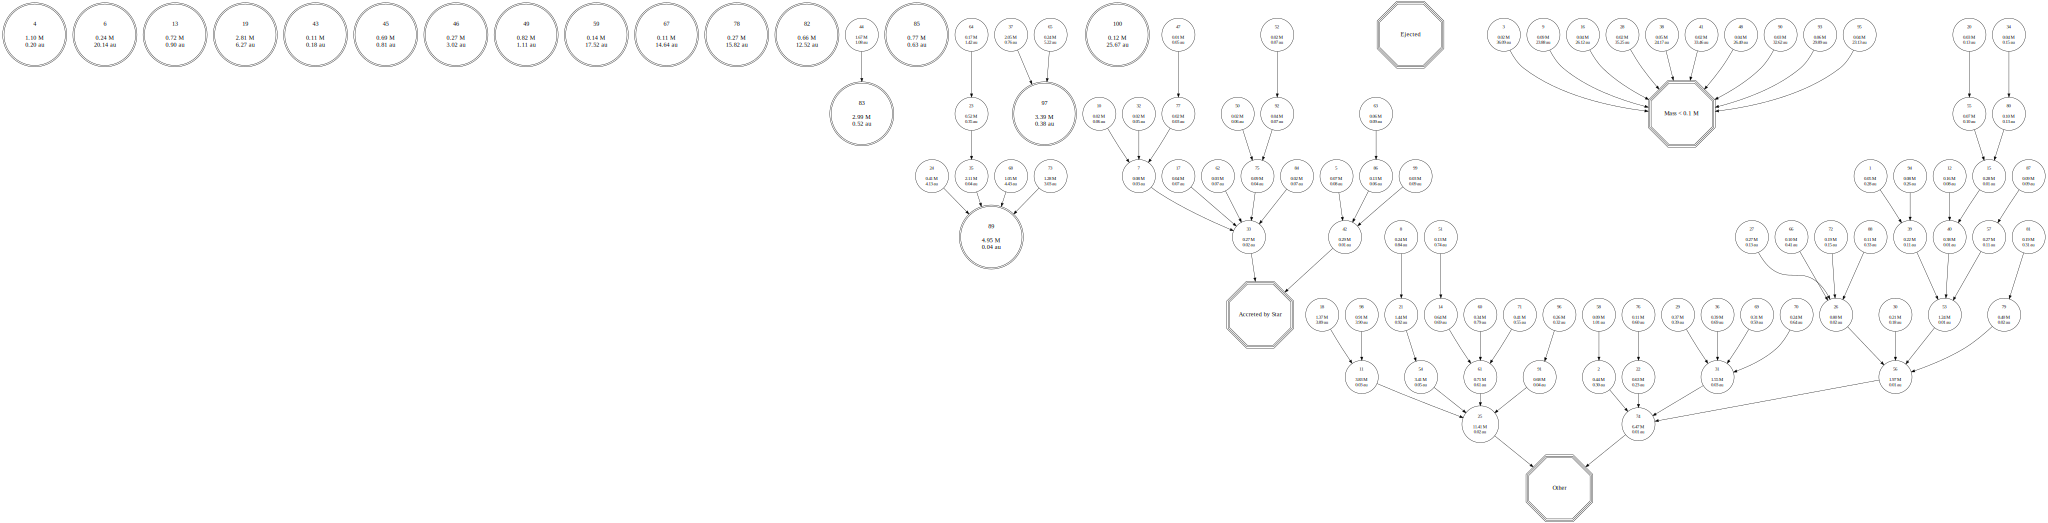

In [21]:
# Get parameters for planets (mass and semi-major axis)
params_dict = get_params(data)

# Reorganize data to be able to draw diagram
new_status_dictionary = reorganize_status_data(status_dictionary, params_dict)

# Generate the diagram
diagram = draw_status_diagram(new_status_dictionary)
diagram

We can also save it to a file.

In [ ]:
# Save diagram to file
diagram.render(f'{last_name}_{sim}_{isystem:04d}/status_diagram', cleanup=True, format='png')